In [5]:
import pandas as pd 
import seaborn as sns

In [6]:
df = pd.read_csv('Brand_stat.csv', encoding='windows-1251')

In [7]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [8]:
user_df = df[['tc','art_sp']]

In [9]:
user_df = user_df.rename(columns={'tc' : 'user_id', 'art_sp' : 'brand_info'})

In [10]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [11]:
def split_brand (brand_name_data):
    return brand_name_data.split(' ')[-1]

In [12]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [13]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [14]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name' : 'count'}) \
    .rename(columns={'brand_name' : 'purchases'}) \
    .query('purchases  >= 5')
    

In [15]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [16]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [17]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
            .agg({'brand_info' : 'count'}) \
            .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
            .groupby('user_id') \
            .head(1) \
            .rename(columns={'brand_name' : 'lovely_brand', 'brand_info' : 'lovely_brand_purchases'})


    

In [18]:
user_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name' : pd.Series.nunique}) \
    .rename(columns={'brand_name' : 'unique_brands'})

In [19]:
user_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [20]:
loyality_df = users_purchases \
    .merge(user_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [21]:
loyality_df.head

<bound method NDFrame.head of          user_id  purchases  unique_brands lovely_brand  \
0           1031          6              2  Store_Brand   
1           4241          5              2      Brand_4   
2          25971          7              2  Store_Brand   
3          40911         27              5      Brand_4   
4          45181          5              4  Store_Brand   
...          ...        ...            ...          ...   
3378  1408767189          5              1      Brand_4   
3379  1408783189         10              2  Store_Brand   
3380  1408783379          6              2      Brand_1   
3381  1408798879          8              3  Store_Brand   
3382  1408810219          9              2      Brand_2   

      lovely_brand_purchases  
0                          5  
1                          3  
2                          5  
3                         19  
4                          2  
...                      ...  
3378                       5  
3379         

In [22]:
loyal_users = loyality_df[loyality_df.unique_brands == 1]

In [23]:
loyality_df['loyality_score'] = loyality_df.lovely_brand_purchases / loyality_df.purchases

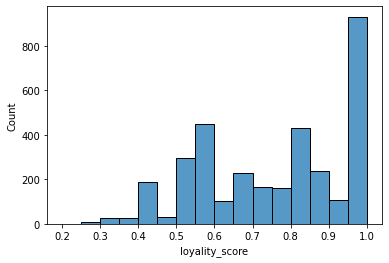

In [24]:
ax = sns.histplot(loyality_df.loyality_score, kde=False)

In [25]:
brand_loyality_df = loyality_df.groupby('lovely_brand' , as_index=False) \
    .agg({'loyality_score' : 'median', 'user_id' : 'count'}) \
    .rename(columns={'user_id' : 'users_count'})

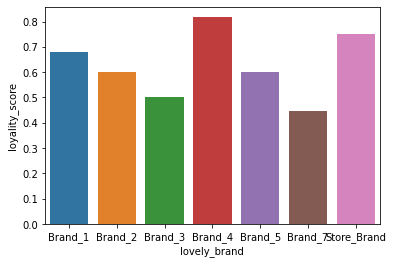

In [26]:
ax = sns.barplot(x='lovely_brand', y='loyality_score', data=brand_loyality_df)